# Imports
Import python libraries

In [20]:
import os

# Set dataset parameters
Choose the attributes to load the dataset.

In [21]:

detectors = ['mtcnn_serfiq']  # ,'dlib', 'opencv', 'mediapipe','mtcnn'
embedding_models = ['QMagFace','ArcFace','Facenet512']  # "ArcFace","Dlib", 'VGG-Face','FaceVACs', 'Facenet512','ArcFace_normalized','QMagFace'
quality_models = ['ser_fiq','tface'] # , 'tface'


# Set LR parameters
Calibration, image filters, face filters, quality filters...

## Calibration

In [22]:
calibrators = ['logit']  # 'KDE', , 'isotonic','logit'
calibration_db = ["SCFace",'xqlfw'] # "LFW", 'xqlfw' which datasets using to calibrate
image_filters = []   # 'yaw','pitch','roll', E.g. 'pose','gender'
face_image_filters = []  # 'confusion_score','quality'
quality_filters = [] # 'ser_fiq', 'tface'

n_calibration_pairs = 100000

## Validation

In [23]:
enfsi_years = [2015]

# Video parameters

In [24]:
import numpy as np
#quality_dropout = [0.01, 0.02, 0.05, 0.10, 0.20, 0.5, 1]
quality_dropout = list(np.linspace(0.1,1.0,10))

## Other parameters
Rest of the configuration

In [25]:
metrics = 'euclidean_l2'
embedding_model_as_scorer = True

# Scenarios
Different filters to do computations

In [26]:
scenario0 = []
scenario1 = ['gender', 'age']
scenario2 = ['yaw', 'pitch']
scenario3 = ['glasses', 'beard']
scenario4 = ['low_quality']
scenario5 = ['headgear']
scenario6 = ['terhorst_quality_rounded']

# Input and output directories
Where the sql database is and which folder the results are saved.

In [27]:
home = os.path.expanduser("~")

# SQL database path and name
input_dir = os.path.join(home, 'video_resources', 'sql_database')
db_name = 'colab_main_dataset'

# Where results are saved
output_dir = os.path.join(home, 'video_resources', 'exp_output_test3')

# Preprocess data
Connect to sql database.

In [28]:
from sql_face.alchemy import get_session
from sql_face.tables import *

In [29]:
session = get_session(input_dir, db_name)

# Experiments

All parameters are specified in ExperimentalSetup, that creates a different experiment with all the posible combinations of detectors, embedding_models, calibrators, etc.

In [30]:
from lr_video_face.experiments import ExperimentalSetup

In [31]:
experimental_setup = ExperimentalSetup(detectors, 
                                        embedding_models, 
                                        quality_models,
                                        calibrators, 
                                        calibration_db, 
                                        enfsi_years,
                                        image_filters, 
                                        face_image_filters, 
                                        metrics, 
                                        n_calibration_pairs,
                                        embedding_model_as_scorer,
                                        output_dir,
                                        session,
                                        quality_dropout)

# Results

In [32]:
query = session.query(EmbeddingModel).all()

a = len(query)


In [33]:
""" for exp in experimental_setup:
    exp.perform()
    break  """

' for exp in experimental_setup:\n    exp.perform()\n    break  '

In [34]:
from lr_video_face.evaluators import GlobalEvaluator

In [35]:
global_results = GlobalEvaluator(experimental_setup)    

100%|██████████| 6/6 [31:02<00:00, 310.41s/it]


## Individual plots

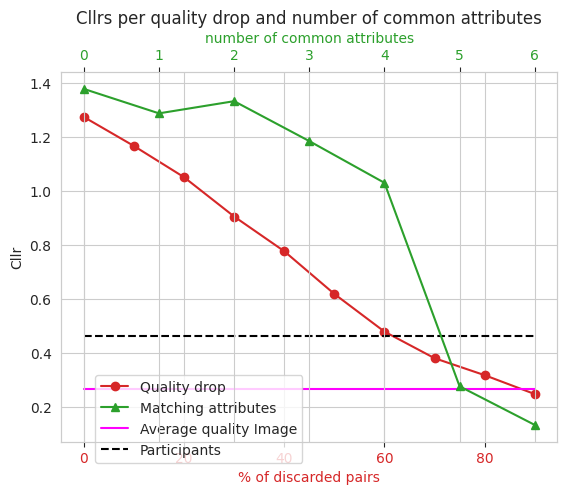

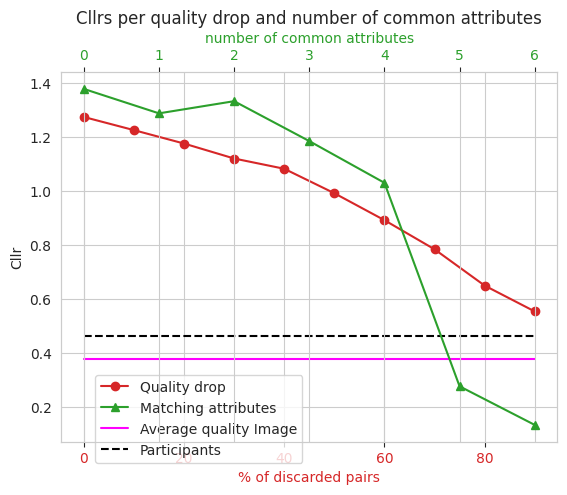

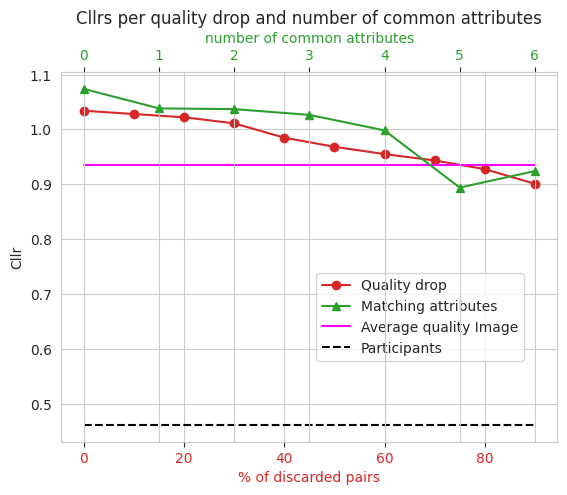

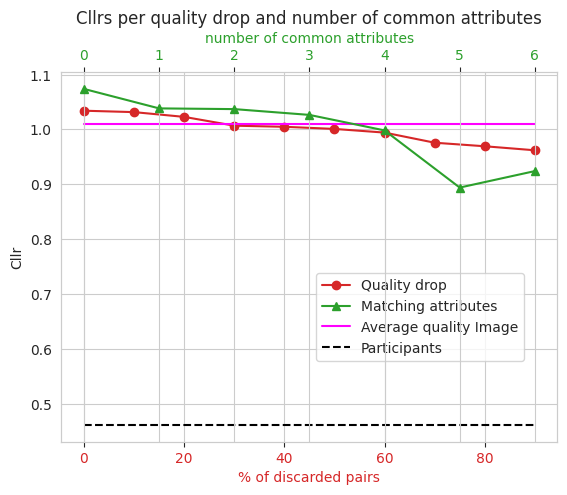

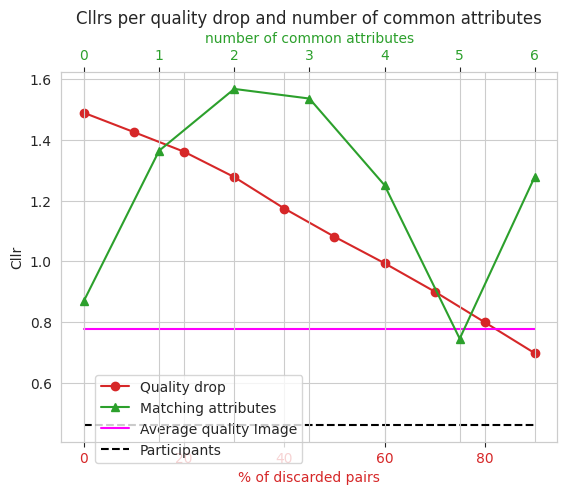

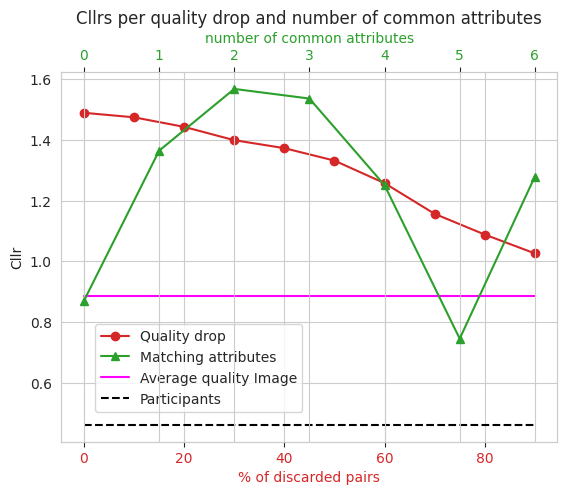

In [36]:
global_results.make_experiment_plots()

## General plot

In [37]:
# import pickle
# with open('data2.db','wb') as outp:
#     pickle.dump(global_results,outp,-1)

In [38]:
global_results.make_global_plot()